<a href="https://colab.research.google.com/github/SeobinYun/2021_Python/blob/master/210113_%EC%88%AD%EC%8B%A4%EB%8C%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup # HTML을 다루는 라이브러리
import requests # 요청하다. 엔터키 역할


url = requests.get("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%A1%9C%EB%98%90").text
html = BeautifulSoup(url)

current_number = int(html.find('a', attrs={'class':'_lotto-btn-current'}).find('em').text[:-1])
current_number


total = []

for n in range(1, current_number + 1):
  url = requests.get("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%A1%9C%EB%98%90+{}%ED%9A%8C".format(n)).text
  html = BeautifulSoup(url)

  numbers = html.find('div', attrs={'class':'num_box'}).find_all('span')
  del numbers[6]

  box = []

  for i in numbers:
    box.append(int(i.text))

  total.append(box)

  print('{}회 로또 데이터 저장완료 : {}'.format(n, box))

1회 로또 데이터 저장완료 : [10, 23, 29, 33, 37, 40, 16]
2회 로또 데이터 저장완료 : [9, 13, 21, 25, 32, 42, 2]
3회 로또 데이터 저장완료 : [11, 16, 19, 21, 27, 31, 30]
4회 로또 데이터 저장완료 : [14, 27, 30, 31, 40, 42, 2]
5회 로또 데이터 저장완료 : [16, 24, 29, 40, 41, 42, 3]
6회 로또 데이터 저장완료 : [14, 15, 26, 27, 40, 42, 34]
7회 로또 데이터 저장완료 : [2, 9, 16, 25, 26, 40, 42]
8회 로또 데이터 저장완료 : [8, 19, 25, 34, 37, 39, 9]
9회 로또 데이터 저장완료 : [2, 4, 16, 17, 36, 39, 14]
10회 로또 데이터 저장완료 : [9, 25, 30, 33, 41, 44, 6]
11회 로또 데이터 저장완료 : [1, 7, 36, 37, 41, 42, 14]
12회 로또 데이터 저장완료 : [2, 11, 21, 25, 39, 45, 44]
13회 로또 데이터 저장완료 : [22, 23, 25, 37, 38, 42, 26]
14회 로또 데이터 저장완료 : [2, 6, 12, 31, 33, 40, 15]
15회 로또 데이터 저장완료 : [3, 4, 16, 30, 31, 37, 13]
16회 로또 데이터 저장완료 : [6, 7, 24, 37, 38, 40, 33]
17회 로또 데이터 저장완료 : [3, 4, 9, 17, 32, 37, 1]
18회 로또 데이터 저장완료 : [3, 12, 13, 19, 32, 35, 29]
19회 로또 데이터 저장완료 : [6, 30, 38, 39, 40, 43, 26]
20회 로또 데이터 저장완료 : [10, 14, 18, 20, 23, 30, 41]
21회 로또 데이터 저장완료 : [6, 12, 17, 18, 31, 32, 21]
22회 로또 데이터 저장완료 : [4, 5, 6, 8, 17, 39, 25]
23회 로또 

In [ ]:
len(total) #945가 나올 거임

945

In [ ]:
import pandas as  pd # pandas, numpy, tensorflow // pandas를 pd라는 이름으로 짧게 사용하겠다.

# pandas : 데이터분석 도구
'''
box=[]
# box = [x for x in range(1,11)]
for i in range(1,10):
  box.append(i)

box
'''

total_df=[]
for i in total:
  # print(i) # 1회부터 945까지의 로또 번호가 출력될 것임.
  df = pd.DataFrame({
      '첫번째 번호' : [i[0]],
      '두번째 번호' : [i[1]],
      '세번째 번호' : [i[2]],
      '네번째 번호' : [i[3]],
      '다섯번째 번호' : [i[4]],
      '여섯번째 번호' : [i[5]],
      '보너스 번호' : [i[6]]      
  })

  total_df.append(df)

# a=pd.concat(total_df, ignore_index=True) # ignore웅앵은 행값을 1,2,3,4,5...이렇게 나타내기 위해
# a
# a.to_excel('lotto.xlsx')

In [ ]:
url=requests.get("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C").text
html = BeautifulSoup(url)

current = int(html.find('a', attrs={'class':'_lottery-btn-current'}).find('em').text[:-1])

total=[]
#numbers=html.find('ul', attrs={'class':'win_num'}).find_all('span')

for n in range(1, current+1):
  url = requests.get("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C+{}%ED%9A%8C".format(n)).text
  html = BeautifulSoup(url)

  numbers=html.find('ul', attrs={'class':'win_num'}).find_all('span')
  
  box=[]
  
  for i in numbers:
   box.append(int(i.text[0]))
  total.append(box)

  print('{}회 연금복권 데이터 저장완료 : {}'.format(n,box))


In [ ]:
import pandas as  pd # pandas, numpy, tensorflow // pandas를 pd라는 이름으로 짧게 사용하겠다.

# pandas : 데이터분석 도구

total_lf=[]
for i in total:
  # print(i) # 1회부터 945까지의 연금 번호가 출력될 것임.
  lf = pd.DataFrame({
      '첫번째 번호' : [i[0]],
      '두번째 번호' : [i[1]],
      '세번째 번호' : [i[2]],
      '네번째 번호' : [i[3]],
      '다섯번째 번호' : [i[4]],
      '여섯번째 번호' : [i[5]],
      '일곱번째 번호' : [i[6]]      
  })

  total_lf.append(lf)

a=pd.concat(total_lf, ignore_index=True) # ignore웅앵은 행값을 1,2,3,4,5...이렇게 나타내기 위해
a
a.to_excel('lottery.xlsx')

In [ ]:
from tqdm import tqdm # for문의 진행상황을 확인할 수 있는 라이브러리

url=requests.get("https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0").text
html=BeautifulSoup(url)
kospi_page=int(html.find('td', attrs={'class':'pgRR'}).find('a')['href'][-2:])
kospi_total=[]

for n in tqdm(range(1,kospi_page+1)):
  url=requests.get("https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page={}".format(n)).text
  html = BeautifulSoup(url)


  table = html.find('table', attrs={'class':'type_2'})
  a=pd.read_html(str(table))[0]
  a=a[a['종목명'].notnull()]

  kospi_total.append(a)

kospi_result=pd.concat(kospi_total, ignore_index=True)
del kospi_result['토론실']
kospi_result['종류']=['KOSPI']*len(kospi_result) # 열을 만들어줌 
kospi_result.to_excel('kospi.xlsx')

100%|██████████| 32/32 [00:21<00:00,  1.50it/s]


In [ ]:
from tqdm import tqdm # for문의 진행상황을 확인할 수 있는 라이브러리

url=requests.get("https://finance.naver.com/sise/sise_market_sum.nhn?sosok=1").text
html=BeautifulSoup(url)
kosdaq_page=int(html.find('td', attrs={'class':'pgRR'}).find('a')['href'][-2:])
kosdaq_total=[]

for n in tqdm(range(1,kosdaq_page+1)):
  url=requests.get("https://finance.naver.com/sise/sise_market_sum.nhn?sosok=1&page={}".format(n)).text
  html = BeautifulSoup(url)

  table = html.find('table', attrs={'class':'type_2'})
  a=pd.read_html(str(table))[0]
  a=a[a['종목명'].notnull()]

  kosdaq_total.append(a)

kosdaq_result=pd.concat(kosdaq_total, ignore_index=True)
del kosdaq_result['토론실']
kosdaq_result['종류']=['KOSDAQ']*len(kosdaq_result)
kosdaq_result.to_excel('kosdaq.xlsx')
kosdaq_result

In [ ]:
a=pd.concat([kospi_result, kosdaq_result], ignore_index=True)
a.to_excel('stock.xlsx')
a

In [ ]:
# csv
# tsv

import pandas as pd

df = pd.read_csv('gapminder.tsv', sep='\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [ ]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [ ]:
df.shape

(1704, 6)

In [ ]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [ ]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [ ]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [ ]:
df[['country','year','lifeExp']] #여러개 접근

,country,year,lifeExp
0,Afghanistan,1952,28.801
1,Afghanistan,1957,30.332
2,Afghanistan,1962,31.997
3,Afghanistan,1967,34.020
4,Afghanistan,1972,36.088
...,...,...,...
1699,Zimbabwe,1987,62.351
1700,Zimbabwe,1992,60.377
1701,Zimbabwe,1997,46.809
1702,Zimbabwe,2002,39.989


In [ ]:
df.loc[0] #행이름

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [ ]:
df.iloc[0] # 행순서

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [ ]:
df.iloc[-1]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [ ]:
df.loc[[0,10,100,1000]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


In [ ]:
df.loc[:,['country','year']] # ':':모든것 loc[행,열]

,country,year
0,Afghanistan,1952
1,Afghanistan,1957
2,Afghanistan,1962
3,Afghanistan,1967
4,Afghanistan,1972
...,...,...
1699,Zimbabwe,1987
1700,Zimbabwe,1992
1701,Zimbabwe,1997
1702,Zimbabwe,2002


In [ ]:
df.iloc[:, [0,2]] #loc은 이름, iloc은 순서로 명시

,country,year
0,Afghanistan,1952
1,Afghanistan,1957
2,Afghanistan,1962
3,Afghanistan,1967
4,Afghanistan,1972
...,...,...
1699,Zimbabwe,1987
1700,Zimbabwe,1992
1701,Zimbabwe,1997
1702,Zimbabwe,2002


In [ ]:
df.loc[[0,100,1000],['country','year']]

,country,year
0,Afghanistan,1952
100,Bangladesh,1972
1000,Mongolia,1972


In [ ]:
df.iloc[:,1:3]

,continent,year
0,Asia,1952
1,Asia,1957
2,Asia,1962
3,Asia,1967
4,Asia,1972
...,...,...
1699,Africa,1987
1700,Africa,1992
1701,Africa,1997
1702,Africa,2002


In [ ]:
a=df.groupby('year')['lifeExp'].mean()
a.to_excel('result.xlsx')
a

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

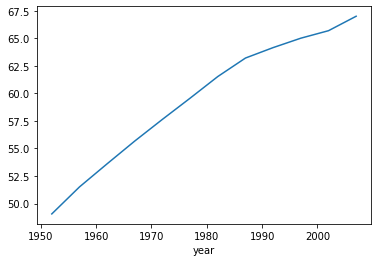

In [ ]:
a.plot() # 연도가 갈수록 기대수명이 올라간다는 걸 가시화, 그래프로 나타냄

In [ ]:
a=df.groupby(['year', 'continent'])['lifeExp'].mean()
a.to_excel('result.xlsx')
a